In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')

In [2]:
vehicle_stock = pd.read_csv(f'./../TEAM-Kenya_data_out/dashboard-data-out/vehstock-byfuel.csv')
vehicle_stock

,Year,Scenario,Tech.VehType,Tech.Fuel,Value
0,2015,"Omoka (""Growth"")",Motorcycle,Gasoline,989952.677000
1,2015,"Omoka (""Growth"")",Motorcycle,Electricity,49009.685300
2,2015,"Omoka (""Growth"")",Car,Gasoline,334109.715800
3,2015,"Omoka (""Growth"")",Car,Diesel,211847.983700
4,2015,"Omoka (""Growth"")",Car,Electricity,0.313146
...,...,...,...,...,...
420,2050,Streetfighting,Train,Diesel,3517.449859
421,2050,Streetfighting,Ship,Diesel,50.099998
422,2050,Streetfighting,Aeroplane,Aviation fuel (Jet A-1),78.959902
423,2050,Streetfighting,Aeroplane,Electricity,173.458560


In [3]:
vehicle_stock['Year'].unique().tolist()

[2015, 2030, 2040, 2050]

In [4]:
vehicle_stock['Tech.VehType'].unique()

array(['Motorcycle', 'Car', 'Bus', 'Truck', 'Train', 'Ship', 'Aeroplane'],
      dtype=object)

In [5]:
# define vehtype and fuel groupings 
vehtype_groupings = {'Moto': ['Motorcycle'], 'Car': ['Car'], 'Bus/Matatu': ['Bus'], 'Truck': ['Truck'], 'Train': ['Train'], 'Ship': ['Ship'], 'Aeroplane': ['Aeroplane']}

fuel_groupings = {'Petrol': ['Gasoline'], 'Battery Electric': ['Electricity'], 'Diesel': ['Diesel'], 'Biofuels/Mixes': ['Bioethanol(85)-petrol(15) blend', 'Biodiesel (FT, synthetic)'], 'Hydrogen': ['Liquefied Hydrogen', 'Gaseous Hydrogen'], 'Jet Fuel': ['Aviation fuel (Jet A-1)'], 'CNG/LPG':['Compressed Natural Gas', 'Liquified Petroleum Gas']}

# define scenarios and years
scenarios = ['Omoka ("Growth")',
 'Electric Dreams',
 'Kujinao ("Know yourself")',
 'Streetfighting']

years = [2015, 2030, 2040, 2050]

In [6]:
# stacked bar chart - scenario comparison. first, populate data
data_by_scenario = {}

for scenario in scenarios:

    data_by_year = {}
    
    for year in years:
        
        data_by_vehtype = {}
        
        for vehtype in vehtype_groupings:
            
            data_by_fuel = {}
            
            for fuel in fuel_groupings:
                
                data_by_fuel[fuel] = vehicle_stock[(vehicle_stock['Scenario'] == scenario) & (vehicle_stock['Year'] == year) & (vehicle_stock['Tech.VehType'].isin(vehtype_groupings[vehtype])) & (vehicle_stock['Tech.Fuel'].isin(fuel_groupings[fuel]))]['Value'].sum()
                
            data_by_vehtype[vehtype] = data_by_fuel
            
        data_by_year[year] = data_by_vehtype
        
    data_by_scenario[scenario] = data_by_year

In [7]:
# group chart data by veh type and fuel
chart_data = {}

for vehtype in vehtype_groupings:
    
    for fuel in fuel_groupings:
        
        data_list = []
        
        for scenario in scenarios:
            
            for year in years:
                
                if year == 2015:
                    if scenario == 'Omoka ("Growth")':
                        data_list.append(vehicle_stock[(vehicle_stock['Scenario'] == scenario) & (vehicle_stock['Year'] == year) & (vehicle_stock['Tech.VehType'].isin(vehtype_groupings[vehtype])) & (vehicle_stock['Tech.Fuel'].isin(fuel_groupings[fuel]))]['Value'].sum())       

                else:
                    data_list.append(vehicle_stock[(vehicle_stock['Scenario'] == scenario) & (vehicle_stock['Year'] == year) & (vehicle_stock['Tech.VehType'].isin(vehtype_groupings[vehtype])) & (vehicle_stock['Tech.Fuel'].isin(fuel_groupings[fuel]))]['Value'].sum())       
                    
                # if vehicle_stock[(vehicle_stock['Scenario'] == scenario) & (vehicle_stock['Year'] == year) & (vehicle_stock['Tech.VehType'].isin(vehtype_groupings[vehtype])) & (vehicle_stock['Tech.Fuel'].isin(fuel_groupings[fuel]))]['Value'].sum() > 0:
                        
        chart_data[f'{vehtype}, {fuel}'] = data_list

In [8]:
labels = ('Baseline 2015',
 'Omoka 2030',
 'Omoka 2040',
 'Omoka 2050',
 'Electric Dreams 2030',
 'Electric Dreams 2040',
 'Electric Dreams 2050',
 'Kujinao 2030',
 'Kujinao 2040',
 'Kujinao 2050',
 'Streetfighting 2030',
 'Streetfighting 2040',
 'Streetfighting 2050')

In [9]:
chart_data

{'Moto, Petrol': [989952.677,
  438870.1054,
  32210.67897,
  4313.492108,
  312306.2546,
  6475.673835,
  775.4982335,
  467146.2208,
  57604.39321,
  16807.72547,
  859755.9373,
  393453.9849,
  290666.8472],
 'Moto, Battery Electric': [49009.6853,
  1525388.345,
  2359579.136,
  2785479.33,
  2769430.35,
  4355625.481,
  5754860.279,
  1454137.162,
  2400887.218,
  2986078.042,
  831584.344,
  1598267.595,
  1999512.695],
 'Moto, Diesel': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'Moto, Biofuels/Mixes': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'Moto, Hydrogen': [0.0,
  0.000581618,
  0.0,
  0.0,
  0.000181491,
  0.0,
  0.0,
  0.000772382,
  0.000267399,
  0.000417472,
  0.002453047,
  0.007635886,
  0.010851088],
 'Moto, Jet Fuel': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'Moto, CNG/LPG': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.

In [10]:
# colour by vehicle type, hash by fuel type
clr_palette = sns.color_palette('colorblind')
clrs = {}
cnt=0
for vehtype in vehtype_groupings:
    clrs[vehtype] = clr_palette[cnt]
    cnt+=1
    
cnt=0
hatches = ['oo', 'xx', '++', '-', '||', '//', '\\\\']
htchs = {}
for fuel in fuel_groupings:
    htchs[fuel] = hatches[cnt]
    cnt+=1

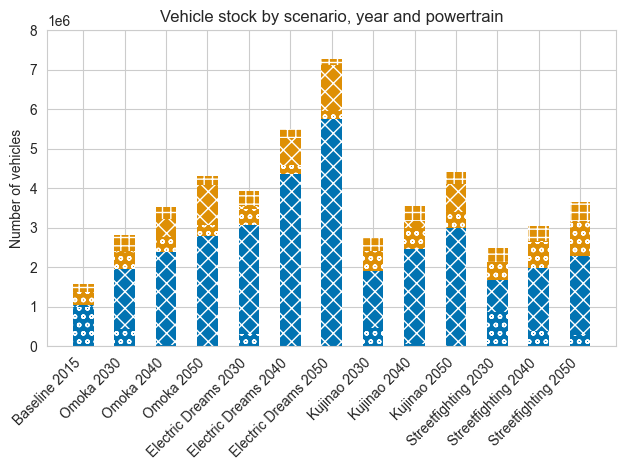

In [11]:
fig, ax = plt.subplots()

bottom = np.zeros(len(labels))

width = 0.5

for cat in chart_data:
    p = ax.bar(labels, chart_data[cat], width, label=cat, bottom=bottom, color= clrs[cat.split(',')[0]], hatch=htchs[cat.split(',')[1][1:]], linewidth=0)
    bottom += chart_data[cat]
    
fig.autofmt_xdate(rotation=45)

ax.set_title('Vehicle stock by scenario, year and powertrain')
# ax.legend(loc="upper right")
ax.set_ylim(top=8e6)

ax.set_ylabel('Number of vehicles')

fig.tight_layout()

plt.savefig('Vehicle-stock.pdf')

In [12]:
# export chart data to csv for report
chart_df = pd.DataFrame(chart_data)
chart_df['Label'] = labels
chart_df = chart_df[['Label']+[c for c in chart_df.columns if c != 'Label']]
chart_df.to_csv('./csv/vehicle-stock.csv', index=False)